<a href="https://colab.research.google.com/github/estebanhernandezr/Entregas-Semanales/blob/main/AndreyEsteban_LizarazoHernandez_proyecto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejecutar** la siguiente celda para **actualizar** la versión de **excel** de python y poder leer los archivos **.csv**.

In [1]:
pip install --upgrade xlrd 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


**Ejecutar** la siguiente celda para **importar** las **librerias** necesarias para el desarrollo de este proyecto.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Ejecutar** la siguiente celda para **definir** las **rutas** hacia la ubicación de los archivos **.csv**.

**Modificar** estas rutas para **cambiar** los conjuntos de **datos**.

In [7]:
marketing_campaign_info_path = '/content/bank-full.csv'

**Ejecutar** la siguiente celda para **declarar** algunas **funciones** que ayudan a **visualizar** el conjunto de **datos**.

In [50]:
def stackedbar_dataframe(dataframe, col1, col2, norm=True):
    frames = []
    for i in pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist():
        row = pd.DataFrame(dataframe.loc[dataframe[col1] == i][col2].value_counts()).T
        frames.append(row)
    df = pd.concat(frames)
    df = df.set_index([pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist()])
    if norm:
        df = df.div(df.sum(axis=1), axis=0)
    return df

def means_dataframe(dataframe, col1, col2):
    frames = []
    for i in pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist():
        row = pd.DataFrame(dataframe.loc[dataframe[col1] == i][col2].value_counts()).T
        row1 = row.mul(row.columns, fill_value=0)
        row1 = pd.DataFrame(row1.sum(axis = 1)/row.sum(axis = 1))
        frames.append(row1)
    df = pd.concat(frames)
    df = df.set_index([pd.DataFrame(dataframe[col1].value_counts()).index.values.tolist()])
    return df

def plot_stackedbar_chart(dataframe, col1, col2, norm=False):
    df = stackedbar_dataframe(dataframe, col1, col2, norm)
    title = 'Frecuencia de aparición absoluta'
    if norm:
        title = 'Frecuencia de aparición relativa'
    df.plot(kind = 'barh', stacked = True, title = title, mark_right = True)

def plot_mean_chart(dataframe, col1, col2):
    df = means_dataframe(dataframe, col1, col2)
    df.plot(kind = 'barh', title = 'Promedio', mark_right = True)

**Ejecutar** la siguiente celda para **cargar** los datos en un **dataframe** de pandas.

In [13]:
marketing_campaign_info = pd.read_csv(marketing_campaign_info_path, delimiter=';')

**Descripción de los datos:**

Campañas de marketing para una entidad bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas.

Cada fila corresponde a la descripción de la persona encuestada durante la llamada.


In [14]:
marketing_campaign_info

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


A continuación, **visualizamos** la **distribución** de **edad** de las personas **encuestadas**.

In [16]:
marketing_campaign_info['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

El **promedio** de **edad** de la persona **encuestada** es de **40 años**: la persona **más joven** encuestada tiene **18 años** y **la mayor** tiene **95 años**. El **75 porciento** de las personas **encuestadas** es **menor** de **50 años**.

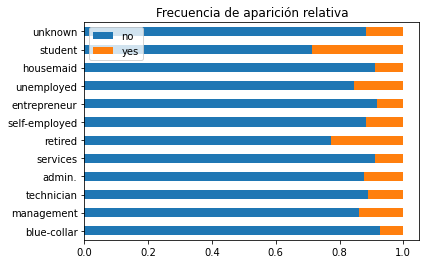

In [56]:
plot_stackedbar_chart(marketing_campaign_info, 'job', 'y', norm=True)

Podemos ver que el promedio de ingresos se ubica en al rededor de 

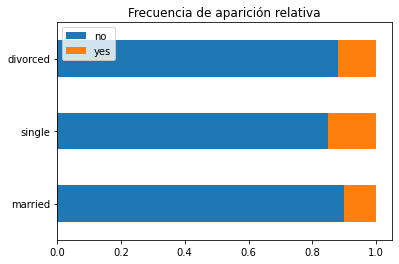

In [60]:
plot_stackedbar_chart(marketing_campaign_info, 'marital', 'y', norm=True)

**Variando** el **parámetro** ***norm*** en la función ***plot_stackedbar_chart($\cdot$)***, que generó la gráfica anterior, podemos inferir varias cosas:

1.   Solo se tienen registros de personas con alguno de los estados civiles: divorciado, soltero y casado. El estado civil del cual se tienen más registros es el de personas casadas, y del que menos: personas divorciadas.
2.   La mayor cantidad de suscripciones a un depósito a plazo, en términos absolutos, se presentan en el grupo de personas con estado civil de casadas, aunque la proporción, relativa, es comparable a la de los otros dos estados civiles, con aproximadamente un 15 porciento de las personas de cada grupo: es poco factible predecir con éxito la suscripción a un deposito a plazo en base al estado civil de la persona.



In [42]:
marketing_campaign_info['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [23]:
marketing_campaign_info['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [25]:
marketing_campaign_info['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [26]:
marketing_campaign_info['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [27]:
marketing_campaign_info['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [28]:
marketing_campaign_info['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [30]:
marketing_campaign_info['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64